In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.datasets import load_boston

Using TensorFlow backend.
C:\Users\dukuy\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\dukuy\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\dukuy\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\dukuy\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
#lol dataset
X = pd.read_csv('high_diamond_ranked_10min.csv')
Y = X[['blueWins']]
X = X.drop(['blueWins','gameId','blueCSPerMin','blueGoldPerMin',
        'redFirstBlood','redGoldDiff','redExperienceDiff','redCSPerMin','redGoldPerMin'], axis = 1)
X = np.array(X)
Y = np.array(Y)
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2, random_state = 17)
inputshape = xtrain.shape[1:]
print(inputshape)

(31,)


In [2]:
#bank dataset
X = pd.read_csv('bank-additional-full.csv')
X['y'] = LabelEncoder().fit_transform(X['y'])
X['month'] = LabelEncoder().fit_transform(X['month'])
X['day_of_week'] = LabelEncoder().fit_transform(X['day_of_week'])
X['contact'] = LabelEncoder().fit_transform(X['contact'])
X['loan'] = LabelEncoder().fit_transform(X['loan'])
X['housing'] = LabelEncoder().fit_transform(X['housing'])
X['default'] = LabelEncoder().fit_transform(X['default'])
X['marital'] = LabelEncoder().fit_transform(X['marital'])
X['poutcome'] = LabelEncoder().fit_transform(X['poutcome'])
X = pd.get_dummies(X)
Y = X[['y']]
X = X.drop(['y'], axis = 1)

#shrink size
X = np.array(X)
Y = np.array(Y)
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2, random_state = 17)
inputshape = xtrain.shape[1:]
print(xtest.shape)
datasettype = 1

(8238, 38)


In [2]:
#housing dataset
bos = load_boston()
X = pd.DataFrame(bos.data, columns = bos.feature_names)
Y = pd.DataFrame(bos.target, columns = ['PRICE'])
print(X)
print(Y)
X = np.array(X)
Y = np.array(Y)
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2, random_state = 17)
inputshape = xtrain.shape[1:]
print(xtest.shape)
datasettype = 0

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [2]:
#adult dataset
X = pd.read_csv('adult.csv')
X = X[(X.workclass != '?') & (X.occupation != '?') & (X.native_country != '?')]
ll = X.shape[0]
X2 = pd.read_csv('adult-test.csv')
X2 = X2[(X2.workclass != '?') & (X2.occupation != '?') & (X2.native_country != '?')]
X = X.append(X2)
X['income'] = LabelEncoder().fit_transform(X['income'])
X['sex'] = LabelEncoder().fit_transform(X['sex'])
X = pd.get_dummies(X)
Y = X[['income']]
X = X.drop(['income'], axis = 1)
print(X)
print(Y)
X = np.array(X)
Y = np.array(Y)
xtrain = X[:ll]
xtest = X[ll:]
ytrain = Y[:ll]
ytest = Y[ll:]
inputshape = xtrain.shape[1:]
print(xtrain.shape)
print(xtest.shape)

       age  fnlwgt  education_num  sex  capital_gain  capital_loss  \
0       39   77516             13    1          2174             0   
1       50   83311             13    1             0             0   
2       38  215646              9    1             0             0   
3       53  234721              7    1             0             0   
4       28  338409             13    0             0             0   
...    ...     ...            ...  ...           ...           ...   
16275   33  245211             13    1             0             0   
16276   39  215419             13    0             0             0   
16278   38  374983             13    1             0             0   
16279   44   83891             13    1          5455             0   
16280   35  182148             13    1             0             0   

       hours_per_week  workclass_Federal-gov  workclass_Local-gov  \
0                  40                      0                    0   
1                  13

In [3]:
#abalone dataset
X = pd.read_csv('abalone.csv')
X['Sex'] = LabelEncoder().fit_transform(X['Sex'])
Y = X[['Rings']]
X = X.drop(['Rings'], axis = 1)
print(X)
X = np.array(X)
Y = np.array(Y)
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2, random_state = 17)
inputshape = xtrain.shape[1:]
print(xtest.shape)

      Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0       2   0.455     0.365   0.095        0.5140          0.2245   
1       2   0.350     0.265   0.090        0.2255          0.0995   
2       0   0.530     0.420   0.135        0.6770          0.2565   
3       2   0.440     0.365   0.125        0.5160          0.2155   
4       1   0.330     0.255   0.080        0.2050          0.0895   
...   ...     ...       ...     ...           ...             ...   
4172    0   0.565     0.450   0.165        0.8870          0.3700   
4173    2   0.590     0.440   0.135        0.9660          0.4390   
4174    2   0.600     0.475   0.205        1.1760          0.5255   
4175    0   0.625     0.485   0.150        1.0945          0.5310   
4176    2   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  
0             0.1010        0.1500  
1             0.0485        0.0700  
2             0.1415        0.2100  
3             0.1140   

In [3]:
maxlayer = 5
bounds = np.array([(1, maxlayer), *(((1, 200),)*maxlayer), (0.00001, 0.001)])
dim = len(bounds)
#binary categorical dnn
def dnn(layers, width, lr):
    layers = int(layers)
    width = width.astype('int')
    batchsize = 128
    epoch = 20
    #model construct
    model = Sequential()
    for i in range(layers):
        model.add(Dense(width[i], activation='relu'))
        model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    #loss & opt
    model.compile(loss=keras.losses.binary_crossentropy,
        optimizer=keras.optimizers.adam(lr=lr, beta_1 = 0.9, beta_2 = 0.999),
        metrics=['acc'])
    #train
    model.fit(xtrain, ytrain, batch_size=batchsize, epochs=epoch, verbose=0)
    res = model.evaluate(xtest, ytest, verbose=0)
#    print('input paras :', layers, width, lr, ' ; ', res)
    keras.backend.clear_session()
    return res

In [3]:
maxlayer = 5
bounds = np.array([(1, maxlayer), *(((1, 200),)*maxlayer), (0.00001, 0.001)])
dim = len(bounds)
#regressive dnn
def dnn(layers, width, lr):
    layers = int(layers)
    width = width.astype('int')
#    print('input paras :', layers, width, lr)
    batchsize = 128
    epoch = 10
    #model construct
    model = Sequential()
    for i in range(layers):
        model.add(Dense(width[i], activation='relu'))
        model.add(Dropout(0.5))
    model.add(Dense(1))
    #loss & opt
    model.compile(loss=keras.losses.MSE,
        optimizer=keras.optimizers.adam(lr=lr, beta_1 = 0.9, beta_2 = 0.999),
        metrics=['acc'])
    #train
    model.fit(xtrain, ytrain, batch_size=batchsize, epochs=epoch, verbose=0)
    res = model.evaluate(xtest, ytest, verbose=0)
    print('input paras :', layers, width, lr, ' ; ', res)
    return res

In [4]:
#de perturbation (mutation)
def pert1(P, size, F, Gbi):
    #DE/rand/1/bin
    V = []
    for j in range(size):
        idxs = [idx for idx in range(size) if idx != j]
        a, b, c = P[np.random.choice(idxs, 3, replace = False)]
        V += [np.clip(a + F * (b - c), 0, 1)]
    return V

def pert2(P, size, F, Gbi):
    #DE/best/1/bin
    V = []
    for j in range(size):
        idxs = [idx for idx in range(size) if idx != j]
        b, c = P[np.random.choice(idxs, 2, replace = False)]
        V += [np.clip(P[Gbi] + F * (b - c), 0, 1)]
    return V

def pert3(P, size, F, Gbi):
    #DE/best/2/bin
    V = []
    for j in range(size):
        idxs = [idx for idx in range(size) if idx != j]
        b, c, d, e = P[np.random.choice(idxs, 4, replace = False)]
        V += [np.clip(P[Gbi] + F * (b - c + d - e), 0, 1)]
    return V

def pert4(P, size, F, Gbi):
    #DE/current-to-best/1/bin
    V = []
    for j in range(size):
        idxs = [idx for idx in range(size) if idx != j]
        b, c = P[np.random.choice(idxs, 2, replace = False)]
        V += [np.clip(P[j] + F * (P[Gbi] - P[j] + b - c), 0, 1)]
    return V

In [5]:
def DE(categ = 1):
    #de hypers
    popsize = 10
    crossrate = 0.7
    mutrate = 0.8
    steps = gens
#    print('dim:', dim)
    #categ 0:loss , 1:acc

    #init
    pop = np.random.rand(popsize, dim)
    pop2 = bounds[:, 0] + pop * (bounds[:, 1] - bounds[:, 0])
    fitness = [dnn(pop2[i,0],pop2[i,1:-1],pop2[i,-1])[categ] for i in range(popsize)]
    if categ:
        Gbi = np.argmax(fitness)
    else:
        Gbi = np.argmin(fitness)
    Gbfit = fitness[Gbi]
#    print('init : best fit', Gbfit)
#    print('paras:', int(pop2[Gbi,0]),pop2[Gbi,1:-1].astype('int'),'%.4f'%pop2[Gbi,-1])
    #steps
    step = 1
    res = np.zeros((steps,))
    while step<=steps:
#        print('step', step, ':')
        #mutate
        mut = pert(pop, popsize, mutrate, Gbi)
        #recombine
        trial = []
        trial2 = []
        for j in range(popsize):
            cross_points = np.random.rand(dim) < crossrate
            if not np.any(cross_points):
                cross_points[np.random.randint(0, dim)] = True
            trial += [np.where(cross_points, mut[j], pop[j])]
            trial2 += [bounds[:, 0] + trial[j] * (bounds[:, 1] - bounds[:, 0])]
        #selection
        trialfit = [dnn(trial2[i][0],trial2[i][1:-1],trial2[i][-1])[categ] for i in range(popsize)]
        for j in range(popsize):
            if categ and trialfit[j] > fitness[j] or not categ and trialfit[j] < fitness[j]:
                fitness[j] = trialfit[j]
                pop[j] = trial[j]
                pop2[j] = trial2[j]
                if categ and trialfit[j] > Gbfit or not categ and trialfit[j] < Gbfit:
                    Gbfit = trialfit[j]
                    Gbi = j
#        print('step %d : best fit' % (step), Gbfit)
#        print('paras:', int(pop2[Gbi,0]),pop2[Gbi,1:-1].astype('int'),'%.4f'%pop2[Gbi,-1])
        res[step-1] = Gbfit
        step += 1
    return res

In [6]:
def PSO(categ = 1):
    #pso hypers
    popsize = 10
    w = 0.4
    c1 = 0.4
    c2 = 0.6
    steps = 30
    print('dim:', dim)
    #categ 0:loss , 1:acc

    #init
    P = np.random.rand(popsize, dim)
    V = np.random.rand(popsize, dim)*0.4-0.2
    P2 = bounds[:, 0] + P * (bounds[:, 1] - bounds[:, 0])
    fitness = [dnn(P2[i,0],P2[i,1:-1],P2[i,-1])[categ] for i in range(popsize)]
    if categ:
        Gbest = P[np.argmax(fitness)]
        Gbest2 = P2[np.argmax(fitness)]
        Gbfit = np.max(fitness)
    else:
        Gbest = P[np.argmin(fitness)]
        Gbest2 = P2[np.argmin(fitness)]
        Gbfit = np.min(fitness)
    Pbest = P
#    print('init : best fit', Gbfit)
#    print('paras:', int(Gbest2[0]),Gbest2[1:-1].astype('int'),'%.4f'%Gbest2[-1])
    #steps
    step = 1
    res = np.zeros((steps,))
    while step<=steps:
        #partical move
        r1 = np.random.rand(popsize, dim)
        r2 = np.random.rand(popsize, dim)
        V = w*V + c1*r1*(Pbest-P) + c2*r2*(Gbest-P)
        P = np.clip(P + V, 0, 1)
        #fitness
        P2 = bounds[:, 0] + P * (bounds[:, 1] - bounds[:, 0])
        tempfit = [dnn(P2[i][0],P2[i][1:-1],P2[i][-1])[categ] for i in range(popsize)]
        for j in range(popsize):
            if categ and tempfit[j] > fitness[j] or not categ and tempfit[j] < fitness[j]:
                fitness[j] = tempfit[j]
                Pbest[j] = P[j]
                if categ and tempfit[j] > Gbfit or not categ and tempfit[j] < Gbfit:
                    Gbfit = tempfit[j]
                    Gbest = P[j]
                    Gbest2 = P2[j]
        print('step %d : best fit' % (step), Gbfit)
        print('paras:', int(Gbest2[0]),Gbest2[1:-1].astype('int'),'%.4f'%Gbest2[-1])
        res[step-1] = Gbfit
        step += 1
    return res

In [4]:
def GS(categ = 1):
    slices = 5
    possible = []
    for i in range(dim):
        possible += [[]]
        for j in range(slices):
            possible[i] += [bounds[i,0] + (bounds[i,1] - bounds[i,0]) * j / (slices-1)]
    print(possible)
    
    Gbest = None
    Gbfit = (1-categ)*99999
   
    for i0 in range(slices):#NL
        for i1 in range(slices):#L1
            for i2 in range(slices):#L2
                for i3 in range(slices):#L3
                    for i4 in range(slices):#L4
                        for i5 in range(slices):#L5
                            for i6 in range(slices):#lr
                                print(i0,i1,i2,i3,i4,i5,i6)
                                res = dnn(possible[0][i0],
                                    np.array([possible[1][i1],possible[2][i2],possible[3][i3],possible[4][i4],possible[5][i5]]),
                                    possible[6][i6])[categ]
                                if categ and res > Gbfit or not categ and res < Gbfit:
                                    Gbfit = res
                                    Gbest = (int(possible[0][i0]),
                                        np.array([possible[1][i1],possible[2][i2],possible[3][i3],possible[4][i4],possible[5][i5]]),
                                        possible[6][i6])
                            if possible[0][i0]<5:
                                break
                        if possible[0][i0]<4:
                            break
                    if possible[0][i0]<3:
                        break
                if possible[0][i0]<2:
                    break
    return Gbfit, Gbest

In [28]:
def RS(categ = 1):
    popsize = 10
    scope = 0.5
    steps = 30
    
    b2 = bounds.copy()
    Gbest = None
    Gbfit = (1-categ)*99999
    res = np.zeros((steps,))
    for step in range(steps):
        P = b2[:, 0] + np.random.rand(popsize, dim) * (b2[:, 1] - b2[:, 0])
        Pfit = [dnn(P[i][0],P[i][1:-1],P[i][-1])[categ] for i in range(popsize)]
        if categ:
            besti = np.argmax(Pfit)
        else:
            besti = np.argmin(Pfit)
        if categ and Pfit[besti] > Gbfit or not categ and Pfit[besti] < Gbfit:
            Gbfit = Pfit[besti]
            Gbest = P[besti]
        print('step %d : best fit' % (step+1), Gbfit)
        print('paras:', int(Gbest[0]),Gbest[1:-1].astype('int'),'%.4f'%Gbest[-1])
        res[step] = Gbfit
        #shrink scope
        lower = Gbest - (b2[:,1] - b2[:,0]) * scope / 2
        upper = Gbest + (b2[:,1] - b2[:,0]) * scope / 2
        for i in range(dim):
            lower[i] = max(lower[i], bounds[i,0])
            upper[i] = min(upper[i], bounds[i,1])
        b2[:,0] = lower
        b2[:,1] = upper
        print(b2)
    return res

In [9]:
#insertion sort
def insert(L, Lfit, GL):
    for i in range(1,len(L)):
        j = i
        while j and (GL and Lfit[j] > Lfit[j-1] or not GL and Lfit[j] < Lfit[j-1]):
            Lfit[j-1], Lfit[j] = Lfit[j], Lfit[j-1]
            t = L[j].copy(), L[j-1].copy()
            L[j-1], L[j] = t
            j -= 1

def GA(categ = 1):
    popsize = 10
    steps = 10
    cr = 0.8
    mr = 0.1
    sr = 8
    #init
    P = np.random.rand(popsize, dim)
    P2 = bounds[:, 0] + P * (bounds[:, 1] - bounds[:, 0])
    Pfit = [dnn(P2[i][0],P2[i][1:-1],P2[i][-1])[categ] for i in range(popsize)]
    #insertion sort
    insert(P,Pfit,categ)
    Gbfit = Pfit[0]
    Gbest = P[0]
    res = np.zeros((steps,))
    
    for step in range(steps):
        #crossover
        chosen = [0,1,2,*np.random.choice([3,4,5,6,7,8,9], sr-3, replace=False)]
        for i in range(0,sr,2):
            if np.random.rand(1)[0] < cr:
                mask = np.random.rand(dim) < 0.5
                if not np.any(mask):
                    mask[np.random.randint(0, dim)] = True
                P[chosen[i]], P[chosen[i+1]] = np.where(mask, P[chosen[i]], P[chosen[i+1]]), np.where(mask, P[chosen[i+1]], P[chosen[i]])
        #mutate
        for i in range(popsize):
            if np.random.rand(1)[0] < mr:
                P[i,np.random.randint(0, dim)] = np.random.rand(1)[0]
        #fitness
        P2 = bounds[:, 0] + P * (bounds[:, 1] - bounds[:, 0])
        Pfit = [dnn(P2[i][0],P2[i][1:-1],P2[i][-1])[categ] for i in range(popsize)]
        #insertion sort
        insert(P,Pfit,categ)
        #review
        if categ and Pfit[0] > Gbfit or not categ and Pfit[0] < Gbfit:
            Gbfit = Pfit[0]
            Gbest = P[0]
        Gbest2 = bounds[:, 0] + Gbest * (bounds[:, 1] - bounds[:, 0])
        print('step %d : best fit' % (step+1), Gbfit)
        print('paras:', int(Gbest2[0]),Gbest2[1:-1].astype('int'),'%.4f'%Gbest2[-1])
        res[step] = Gbfit
    
    return res

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

[90.55110455 90.60694337 90.64093232 90.70162654 90.70162654 90.73076129
 90.74775577 90.74775577 90.79388261 90.79388261 90.79388261 90.79388261
 90.79388261 90.79388261 90.8011663  90.82301617 90.82544327 90.82544327
 90.82544327 90.84243774 90.84243774 90.85214853 90.85214853 90.86428642
 90.86428642 90.86428642 90.86428642 90.86428642 90.86428642 90.86671472]
[90.09953856 90.50254941 90.50254941 90.63364983 90.63364983 90.66278338
 90.66521168 90.73561668 90.75260997 90.79630971 90.79873681 90.82301497
 90.85943103 90.85943103 90.8764255  90.8764255  90.8764255  90.8764255
 90.8764255  90.88856459 90.88856459 90.88856459 90.88856459 90.88856459
 90.88856459 90.88856459 90.88856459 90.88856459 90.88856459 90.89827657]
[90.37387729 90.55838823 90.6579268  90.68220377 90.68220377 90.69191575
 90.69191575 90.69191575 90.69919944 90.69919944 90.69919944 90.71376562
 90.71862102 90.71862102 90.

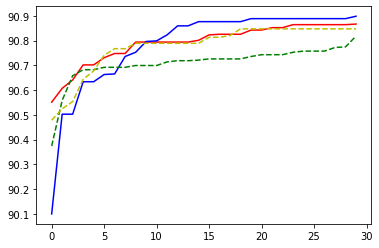

In [6]:
#DE testing of different perturbation
gens = 30
repeat = 5
res = np.zeros((4,gens))

pert = pert1
for i in range(repeat):
    res[0] += DE(datasettype)
res[0] /= repeat
res[0] *= 100
print(res[0])
plt.plot(res[0], 'r-')

pert = pert2
for i in range(repeat):
    res[1] += DE(datasettype)
res[1] /= repeat
res[1] *= 100
print(res[1])
plt.plot(res[1], 'b-')

pert = pert3
for i in range(repeat):
    res[2] += DE(datasettype)
res[2] /= repeat
res[2] *= 100
print(res[2])
plt.plot(res[2], 'g--')

pert = pert4
for i in range(repeat):
    res[3] += DE(datasettype)
res[3] /= repeat
res[3] *= 100
print(res[3])
plt.plot(res[3], 'y--')

plt.show()

In [ ]:
#testing of different seaching method
gens = 50
repeat = 10
#DE/best/1/bin
pert = pert2
res = np.zeros((5,gens))
for i in range(repeat):
    res[0] += DE(datasettype)
res[0] /= repeat
res[0] *= 100
plt.plot(res, 'r-', label = 'DE/best/1/bin')
#DE/current-to-best/1/bin
pert = pert4
for i in range(repeat):
    res[1] += DE(datasettype)
res[1] /= repeat
res[1] *= 100
plt.plot(res, 'c-', label = 'DE/currenttobest')
#PSO
for i in range(repeat):
    res[2] += PSO(datasettype)
res[2] /= repeat
res[2] *= 100
plt.plot(res, 'b-', label = 'PSO')
#RS
for i in range(repeat):
    res[3] += RS(datasettype)
res[3] /= repeat
res[3] *= 100
plt.plot(res, 'g--', label = 'RS')
#GA
for i in range(repeat):
    res[4] += GA(datasettype)
res[4] /= repeat
res[4] *= 100
plt.plot(res, 'y--', label = 'GA')
plt.xlabel('generations')
plt.ylabel('accuracy(%)')
plt.legend()
plt.show()
#GS elsewhere

In [5]:
#GS
res = GS(datasettype)
print(res)

[[1.0, 2.0, 3.0, 4.0, 5.0], [1.0, 50.75, 100.5, 150.25, 200.0], [1.0, 50.75, 100.5, 150.25, 200.0], [1.0, 50.75, 100.5, 150.25, 200.0], [1.0, 50.75, 100.5, 150.25, 200.0], [1.0, 50.75, 100.5, 150.25, 200.0], [1e-05, 0.0002575, 0.000505, 0.0007525, 0.001]]
0 0 0 0 0 0 0
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

0 0 0 0 0 0 1
0 0 0 0 0 0 2
0 0 0 0 0 0 3
0 0 0 0 0 0 4
0 1 0 0 0 0 0
0 1 0 0 0 0 1
0 1 0 0 0 0 2
0 1 0 0 0 0 3
0 1 0 0 0 0 4
0 2 0 0 0 0 0
0 2 0 0 0 0 1
0 2 0 0 0 0 2
0 2 0 0 0 0 3
0 2 0 0 0 0 4
0 3 0 0 0 0 0
0 3 0 0 0 0 1
0 3 0 0 0 0 2
0 3 0 0 0 0 3
0 3 0 0 0 0 4
0 4 0 0 0 0 0
0 4 0 0 0 0 1
0 4 0 0 0 0 2
0 4 0 0 0 0 3
0 4 0 0 0 0 4
1 0 0 0 0 0 0
1 0 0 0 0 0 1
1 0 0 0 0 0 2
1 0 0 0 0 0 3
1 0 0 0 0 0 4
1 0 1 0 0 0 0
1 0 1 0 0 0 1
1 0 1 0 0 0 2
1 0 1 0 0 0 3
1 0 1 0 0 0 4
1 0 2 0 0 0 0
1 0 2 0 0 0 1
1 0 2 0 0 0 2
1 0 2 0 0 0 3
1 0 2 0 0 0 4
1 0 3 0 0 0 0
1 0 3 0 0 0 1
1 0 3 0 0 0 2
1 0 3 0 0 0 3
1 0 3 0 0 0 4
1 0 4 0 0 0 0
1 0 4